# Logistic Regression for classification

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
rawdata = pd.read_excel('Job_Postings(clean).xlsx')
# Drop columns
dataset = rawdata.drop(columns=['job_id','company_profile', 'description','requirements','benefits'])

## The features and the target class of the dataset

In [3]:
features = dataset.columns[1:dataset.columns.shape[0]-1].to_numpy()
print('features:', '\n', features, '\n')

target_class = dataset.columns[dataset.columns.shape[0]-1]
print('target class:', '\n', target_class)

features: 
 ['title' 'location' 'department' 'salary_range' 'telecommuting'
 'has_company_logo' 'has_questions' 'employment_type'
 'required_experience' 'required_education' 'industry' 'function'] 

target class: 
 fraudulent


## Split dataset into inputs and targets

In [4]:
X = dataset.loc[:,'title':'function']
Y = dataset['fraudulent']
print("Input:",X.shape)
print("Targets:",Y.shape)

Input: (17880, 12)
Targets: (17880,)


## Encode the catagorical data

In [5]:
# categorical = ['title','location','department','salary_range','employment_type','required_experience','required_education','industry','function']
# columns = X.loc[:,categorical]
# X = pd.get_dummies(data=columns,drop_first=True)
# X.head()

# Using dict vectorizer

# turn X into dict
X_dict = X.to_dict(orient='records') 

# DictVectorizer
from sklearn.feature_extraction import DictVectorizer
# instantiate a Dictvectorizer object for X
dv_X = DictVectorizer(sparse=False) 
# sparse = False makes the output is not a sparse matrix

# apply dv_X on X_dict
X_encoded = dv_X.fit_transform(X_dict)# show X_encoded
X_encoded.shape

(17880, 15774)

## Split the dataset

In [17]:
X_train = X_encoded[:10729]
Y_train = Y.loc[:10728]

X_validation = X_encoded[10729:16451]
Y_validation = Y.loc[10729:16451]

X_test= X_encoded[16452:]
Y_test= Y.loc[16452:]

print("Training data: ",X_train.shape,Y_train.shape)
print("Validation data: ",X_validation.shape,Y_validation.shape)
print("Test data: ",X_test.shape,'\n')

print('training data example item:','\n\n', X_train[0])

Training data:  (10729, 15774) (10729,)
Validation data:  (5722, 15774) (5723,)
Test data:  (1428, 15774) 

training data example item: 

 [0. 0. 0. ... 0. 0. 0.]


## Train a Logistic Regression Model

In [7]:
class LogisticRegression:
    
    def __init__(self, α=0.7, no_iter=7000):
        self.learn_rate = α
        self.no_iter = no_iter
        self.weights = None
        
    def _sigmoid(self,z):
        return 1 / (1 + np.exp(-z))

    def loss_function(self,h, y):
        return (-y * np.log(h) - (1 - y) * np.log(1 - h)).mean()

    def fit(self,X,Y):
        # Initialise paramters
        no_datapoints,no_features = X.shape
        self.weights = np.zeros(no_features)
        θ_old = np.ones(no_features)
        
        #Gradient Descent
        count= 0
        while np.sqrt(np.sum(np.power(self.weights - θ_old, 2))) > 0.001 and count != self.no_iter:
            θ_old = self.weights
            z = np.dot(X, self.weights)
            h = self._sigmoid(z)
            
            dw = (1/no_datapoints)*np.dot(X.T,(h-Y))
            # Update weight
            self.weights = self.weights - self.learn_rate*dw
            # increment count
            count +=1
        print(count)
    
    def predict(self,X):
        z = np.dot(X, self.weights)
        h = self._sigmoid(z)
        return h


0    10268
1      461
Name: fraudulent, dtype: int64


### 1. Create a model

In [9]:
logreg_model =  LogisticRegression()

### 2. Train the model
i.e Fit

In [10]:
logreg_model.fit(X_train,Y_train)
print("Final weights:",logreg_model.weights)

7000
Final weights: [ 0.22232048 -0.03681768  0.         ... -0.00162703  0.
 -0.00584049]


### 3. Model Predictions

In [30]:
print(Y_train.value_counts())
print(Y_test.value_counts())
print(type(Y_test.to_numpy()[0]))

0    10268
1      461
Name: fraudulent, dtype: int64
0    1093
1     335
Name: fraudulent, dtype: int64
<class 'numpy.int64'>


In [34]:
model_predictions = logreg_model.predict(X_test)
print(model_predictions.shape)
print(type(model_predictions))

(1428,)
<class 'numpy.ndarray'>


In [35]:
frauduluent = np.where(model_predictions >= 0.5)[0]
real = np.where(model_predictions < 0.5)[0]
print("Frauduelent:",frauduluent.shape)
print("Real:",real.shape)
final_predictions = np.zeros(model_predictions.shape)
final_predictions[frauduluent] = 1
final_predictions[real] = 0

Frauduelent: (81,)
Real: (1347,)


## Performance

In [24]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

In [32]:
# targets = Y_test.to_numpy().astype(float)

[[1088    5]
 [ 259   76]]


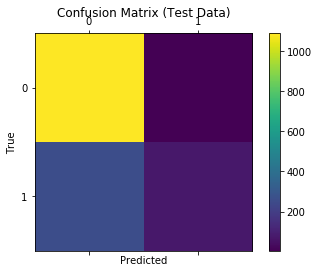

In [37]:
cm = confusion_matrix(Y_test.to_numpy(),final_predictions)
print(cm)
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title("Confusion Matrix (Test Data)")
fig.colorbar(cax)
# ax.set_xticklabels(['']+class_labels)
# ax.set_yticklabels(['']+class_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [13]:
# from sklearn.linear_model import LogisticRegression
# model = LogisticRegression(C=1e20,max_iter= 10000)
# model.fit(X_train,Y_train)